# ***Hierarchical clustering***

# ***Importing Libraries***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ***Importing data set***

In [0]:
data = pd.read_csv("dataset_Facebook.csv")
x = data.iloc[:, 6:19].values

In [4]:
print(x)

[[0.0000e+00 2.7520e+03 5.0910e+03 ... 7.9000e+01 1.7000e+01 1.0000e+02]
 [0.0000e+00 1.0460e+04 1.9057e+04 ... 1.3000e+02 2.9000e+01 1.6400e+02]
 [0.0000e+00 2.4130e+03 4.3730e+03 ... 6.6000e+01 1.4000e+01 8.0000e+01]
 ...
 [0.0000e+00 3.7780e+03 7.2160e+03 ... 9.3000e+01 1.8000e+01 1.1500e+02]
 [0.0000e+00 4.1560e+03 7.5640e+03 ... 9.1000e+01 3.8000e+01 1.3600e+02]
 [       nan 4.1880e+03 7.2920e+03 ... 9.1000e+01 2.8000e+01 1.1900e+02]]


# ***Handle Missing Data***

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(x)
x = imputer.transform(x)

# ***Creating Dendrogram for getting optimal number of cluster***

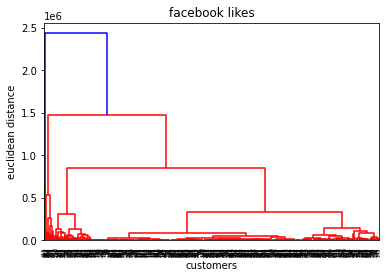

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = "ward", metric = "euclidean", optimal_ordering = False))
plt.title("facebook likes")
plt.xlabel("customers")
plt.ylabel("euclidean distance")
plt.show()

# ***Applying the Hierarchical clustering***

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, linkage = "ward", affinity = "euclidean")
y_hc = hc.fit_predict(x)

In [21]:
print(y_hc)

[6 3 6 0 6 3 3 3 3 6 0 6 6 6 0 3 6 0 6 6 6 6 6 6 3 3 3 6 3 0 6 6 6 6 6 6 6
 3 3 6 3 3 3 6 6 6 3 6 6 6 6 3 6 6 6 3 6 6 6 0 3 0 3 0 6 6 6 0 6 6 0 1 3 3
 3 0 6 3 6 6 3 6 6 6 6 6 3 6 6 6 3 6 6 6 6 6 6 6 3 3 6 0 6 6 6 0 6 3 6 3 6
 6 6 6 6 6 0 6 6 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 6 1 3 0 3 0 6 3 6
 3 6 0 6 6 3 6 6 6 6 6 6 3 6 6 3 6 6 3 3 0 6 6 6 0 6 6 3 3 6 6 6 3 3 6 0 6
 6 6 6 6 6 6 3 6 6 0 6 6 6 6 0 6 6 3 1 6 6 0 6 6 6 0 6 6 6 3 0 6 3 3 6 6 6
 3 3 6 3 6 1 3 6 6 6 3 6 6 3 3 6 6 6 3 6 3 3 1 0 6 6 6 6 6 3 6 3 0 6 0 0 6
 6 6 3 6 6 0 6 6 3 6 6 0 0 0 6 6 3 6 1 6 1 6 6 3 3 0 3 6 3 3 6 6 6 6 6 6 3
 6 6 6 3 6 6 0 3 0 6 6 6 3 6 6 6 6 6 0 0 6 6 6 3 3 6 6 0 6 6 6 6 0 6 3 6 6
 6 3 6 6 6 6 3 6 6 6 6 3 6 0 6 6 0 6 6 0 3 6 6 6 6 6 6 6 6 3 6 0 6 6 6 3 6
 0 3 3 3 6 3 6 6 0 0 1 6 6 6 6 6 3 6 3 6 6 0 3 6 6 6 6 0 6 6 6 0 0 0 6 6 6
 6 0 6 6 6 6 6 6 4 3 6 6 6 6 6 6 6 3 6 6 3 6 6 6 6 6 3 6 3 3 2 6 6 6 6 1 6
 6 6 0 3 3 1 3 6 6 6 3 3 6 3 6 6 5 6 3 2 2 6 6 0 3 3 3 6 6 6 3 6 3 3 6 6 3
 6 3 6 6 6 6 6 3 6 6 6 3 

# **Combining the data with the cluster column**

In [22]:
df = pd.DataFrame(data)
df["cluster"] = y_hc
print(df)

     Page total likes    Type  Category  ...  share  Total Interactions  cluster
0              139441   Photo         2  ...   17.0                 100        6
1              139441  Status         2  ...   29.0                 164        3
2              139441   Photo         3  ...   14.0                  80        6
3              139441   Photo         2  ...  147.0                1777        0
4              139441   Photo         2  ...   49.0                 393        6
..                ...     ...       ...  ...    ...                 ...      ...
495             85093   Photo         3  ...   26.0                  84        6
496             81370   Photo         2  ...   22.0                  75        6
497             81370   Photo         1  ...   18.0                 115        6
498             81370   Photo         3  ...   38.0                 136        6
499             81370   Photo         2  ...   28.0                 119        6

[500 rows x 20 columns]


# **Importing the new data**

In [0]:
df.to_csv(r"hierarchical clustering_facebook likes.csv")